In [1]:
# Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics 
import numpy as np

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read CSV files and create dataframes
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Inspect city data dataframe
# Get the count of values in the data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Inspect city data dataframe
# Get the count of null values 
city_data_df.isnull().sum()


city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Inspect city data dataframe
# Get the dataypes in the dataframe
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Inspect city data dataframe
# Get how many data points there are for each type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Number of data points for urban city types 
sum(city_data_df['type']=='Urban')

66

In [11]:
# Number of data points for suburban city types 
sum(city_data_df['type']=='Suburban')

36

In [12]:
# Number of data points for rural city types 
sum(city_data_df['type']=='Rural')

18

In [13]:
# Inspect the ride data DataFrame
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on = ['city', 'city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
# Create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']


In [24]:
# Create Suburban and Rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']

rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']


In [25]:
# Get the number of rides for each city in each city type dataframe
urban_ride_count =urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count =suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count =rural_cities_df.groupby(['city']).count()['ride_id']


In [26]:
# Get the average fare for each city in each city type dataframe
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']


In [27]:
# Get the average number of drivers for each city in each city type dataframe
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count =suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count =rural_cities_df.groupby(['city']).mean()['driver_count']


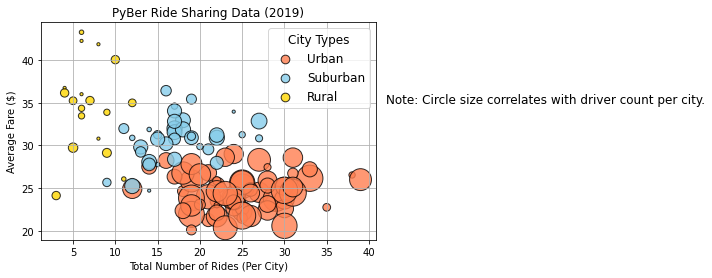

In [57]:
# Scatter Plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10 * urban_driver_count,
            color = 'coral',
            edgecolors = 'k',
            linewidth = 1, 
            alpha = 0.8, 
            label='Urban')

# Scatter Plot for Suburban Cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s= 10*suburban_driver_count, 
            color='skyblue', 
            edgecolors='k', 
            alpha=0.8, 
            linewidth=1, label = 'Suburban')

# Scatter Plot for Rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color = 'gold', 
            edgecolors='k', 
            linewidth =1, 
            alpha = 0.8, label = 'Rural')

plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create the legend 
lgnd = plt.legend(fontsize= '12', 
                  mode='expanded', scatterpoints=1, 
                  loc='best', title ='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label about marker size
plt.text(42,35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('analysis/Fig1.png')
